### 실습 : 주가를 DataFrame으로 저장해보기
- 16.02.23 ~ 16.02.29일 사이의 일자별 주가 중 시가, 고가, 저가, 종가를 DataFrame으로 저장해보자
- 참고로 시가, 고가, 저가, 종가는 영어로 open, high, low, close라고 부르며 약어로 **OHLC**라고 한다

In [1]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2021, 11, 1)
end = datetime.datetime(2022, 10, 31)
df_null = wb.DataReader("005930", "naver", start, end)
kospi = df_null['Close'].dropna().astype('float')

In [2]:
df_null = df_null.iloc[:,:-1].astype(float)

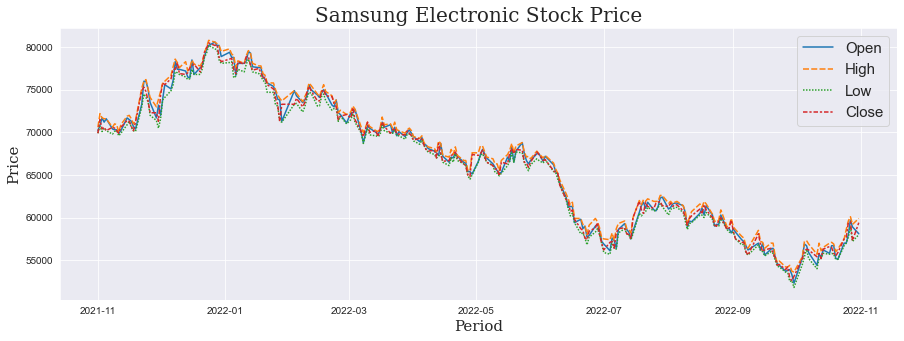

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
%matplotlib inline
plt.figure(figsize = (15,5))
sns.set_style('darkgrid')
sns.lineplot(df_null)
plt.title('Samsung Electronic Stock Price', fontsize = 20, fontfamily = 'Serif')
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif')
plt.legend(loc = 'upper right', prop = {'size' : 15})

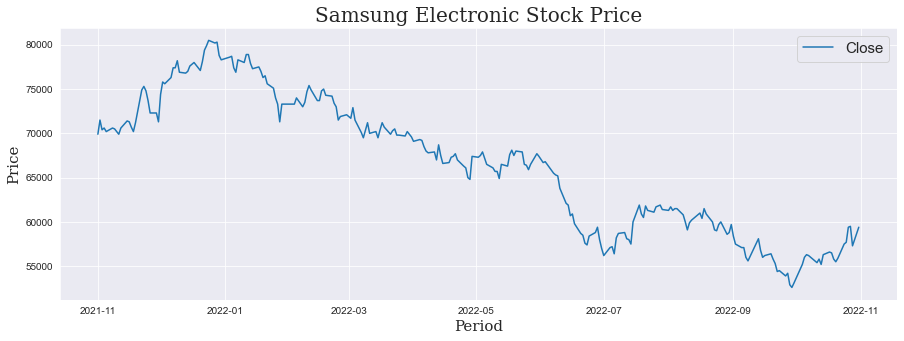

In [4]:
plt.figure(figsize = (15,5))
sns.set_style('darkgrid')
sns.lineplot(df_null.Close, label = 'Close')
plt.title('Samsung Electronic Stock Price', fontsize = 20, fontfamily = 'Serif')
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif')
plt.legend(loc = 'upper right', prop = {'size' : 15})

In [5]:
sample = df_null.iloc[-5:,:].astype(float)
sample

,Open,High,Low,Close
Date,,,,
2022-10-25,57000.0,58600.0,57000.0,57700.0
2022-10-26,58000.0,59600.0,57700.0,59400.0
2022-10-27,59700.0,60100.0,58900.0,59500.0
2022-10-28,58900.0,59200.0,57200.0,57300.0
2022-10-31,58100.0,59900.0,58000.0,59400.0


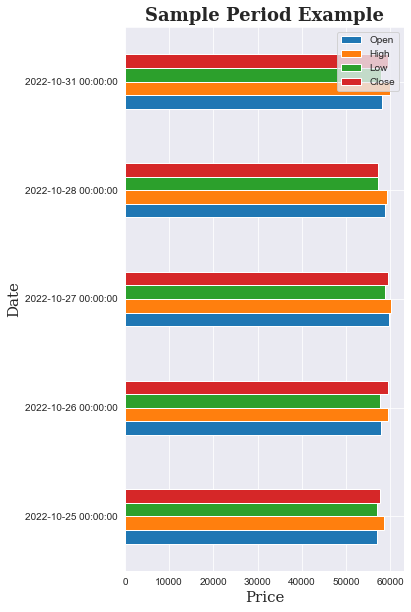

In [6]:
sample.plot(kind = 'barh', figsize = (5,10))
plt.xlabel('Price', fontsize = 15, fontfamily = 'Serif')
plt.ylabel('Date', fontsize = 15, fontfamily = 'Serif')
plt.title('Sample Period Example', fontweight = 'bold', fontsize = 18, fontfamily = 'Serif')
plt.show()


- 주 : 네이버 금융에서 직접 데이터를 불러와 처리하였습니다

### Additional Practice
- 주가를 예측하는 ARIMA 모델을 만들어 본다

In [7]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2022, 10, 31)
df_null = wb.DataReader("005930", "naver", start, end)
kospi = df_null['Close'].dropna().astype('float')

In [8]:
df_null = df_null.iloc[:,:-1].astype(float)

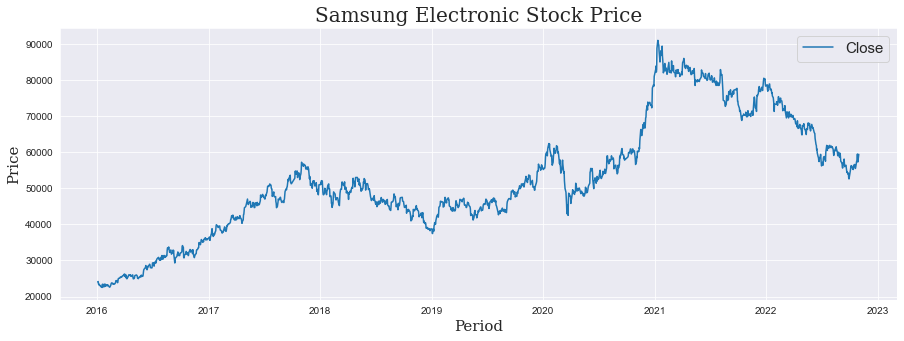

In [9]:
plt.figure(figsize = (15,5))
sns.set_style('darkgrid')
sns.lineplot(df_null.Close, label = 'Close')
plt.title('Samsung Electronic Stock Price', fontsize = 20, fontfamily = 'Serif')
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif')
plt.legend(loc = 'upper right', prop = {'size' : 15})

In [10]:
df_null['log_price'] = np.log(df_null['Close'] / df_null['Close'].shift(1))

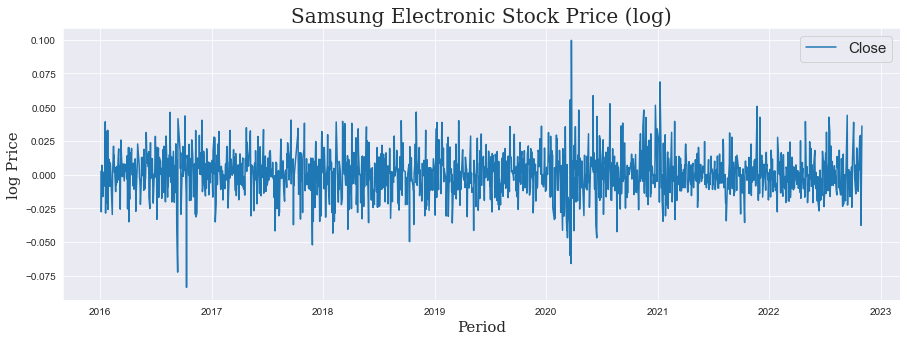

In [11]:
plt.figure(figsize = (15,5))
sns.set_style('darkgrid')
sns.lineplot(df_null['log_price'], label = 'Close')
plt.title('Samsung Electronic Stock Price (log)', fontsize = 20, fontfamily = 'Serif')
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel('log Price', fontsize = 15, fontfamily = 'Serif')
plt.legend(loc = 'upper right', prop = {'size' : 15})

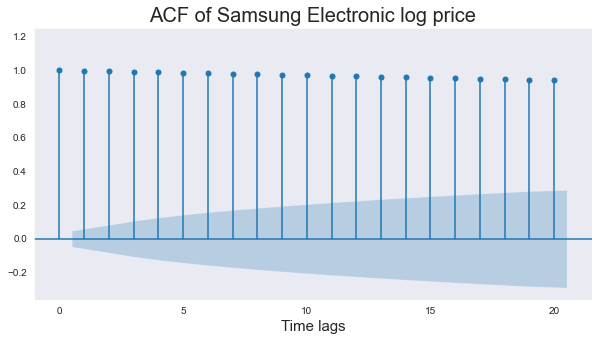

In [12]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_null.dropna(inplace = True)

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(np.log(df_null['Close']), auto_ylims = True, lags = 20 , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of Samsung Electronic log price', fontsize = 20)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


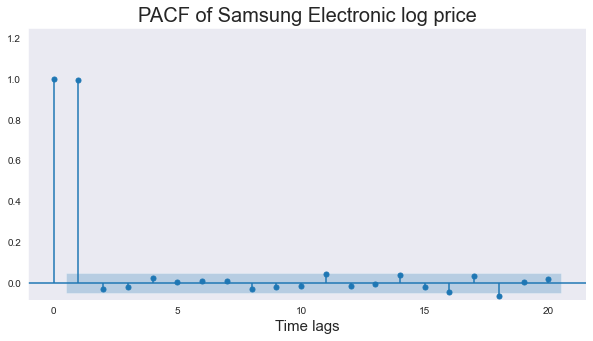

In [13]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(df_null['Close']), auto_ylims = True, lags = 20 , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of Samsung Electronic log price', fontsize = 20)
plt.show()

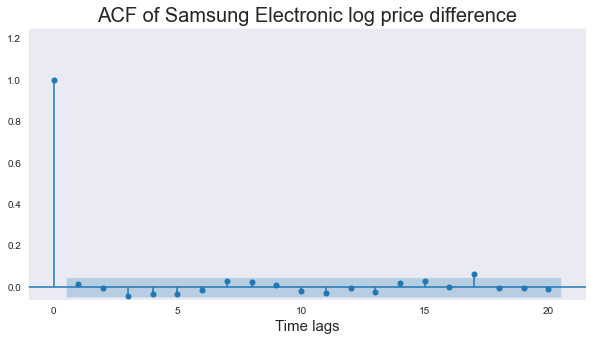

In [14]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_null['log_price'], auto_ylims = True, lags = 20 , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of Samsung Electronic log price difference', fontsize = 20)
plt.show()

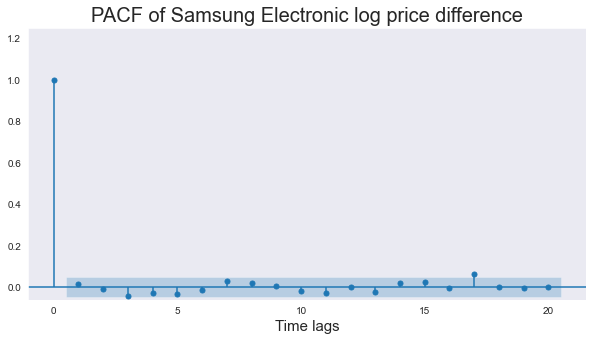

In [15]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_null['log_price'], auto_ylims = True, lags = 20 , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of Samsung Electronic log price difference', fontsize = 20)
plt.show()

log price의 pacf를 보아 AR의 차수는 18, log price difference를 보아 MA의 차수는 17이 좋아 보인다

In [16]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(np.log(df_null['Close']), order = (1,0,17), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1677
Model:                ARIMA(1, 0, 17)   Log Likelihood                4538.834
Date:                Fri, 02 Dec 2022   AIC                          -9037.668
Time:                        23:57:31   BIC                          -8929.173
Sample:                             0   HQIC                         -8997.475
                               - 1677                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6652      0.262     40.725      0.000      10.152      11.178
ar.L1          0.9991      0.001    873.163      0.000       0.997       1.001
ma.L1          0.0154      0.019      0.797      0.425      -0.022       0.053
ma.L2         -0.0046      0.022     -0.207      0.836      -0.048       0.039
ma.L3         -0.0373      0.022     -1.685      0.092      -0.081       0.006
ma.L4         -0.0168      0.025     -0.666      0.506      -0.066       0.033
ma.L5         -0.0279      0.025     -1.108      0.268      -0.077       0.021
ma.L6         -0.0073      0.022     -0.325      0.745      -0.051       0.037
ma.L7          0.0355      0.023      1.519      0.129      -0.010       0.081
ma.L8          0.0229      0.023      1.017      0.309      -0.021       0.067
ma.L9          0.0185      0.023      0.796      0.426      -0.027       0.064
ma.L10        -0.0209      0.025     -0.833      0.405      -0.070       0.028
ma.L11        -0.0220      0.024     -0.933      0.351      -0.068       0.024
ma.L12         0.0007      0.024      0.027      0.979      -0.047       0.048
ma.L13        -0.0212      0.024     -0.872      0.383      -0.069       0.026
ma.L14         0.0288      0.023      1.234      0.217      -0.017       0.074
ma.L15         0.0218      0.025      0.882      0.378      -0.027       0.070
ma.L16         0.0005      0.023      0.022      0.982      -0.044       0.045
ma.L17         0.0676      0.020      3.341      0.001       0.028       0.107
sigma2         0.0003   6.79e-06     38.313      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               312.44
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$r_t = 10.6652 + 0.9991r_{t-1} + 0.0676a_{t-17} + a_t$$

/var/folders/kf/lqv24ch106s1vgrdp1vqf5mh0000gn/T/ipykernel_12148/2324863700.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, kde = True, rug = True , ax = ax1)
/var/folders/kf/lqv24ch106s1vgrdp1vqf5mh0000gn/T/ipykernel_12148/2324863700.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 1.0, 'Residual vs. Normal')

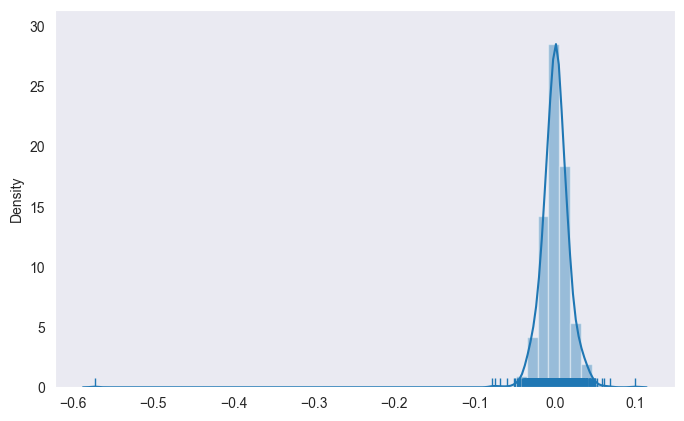

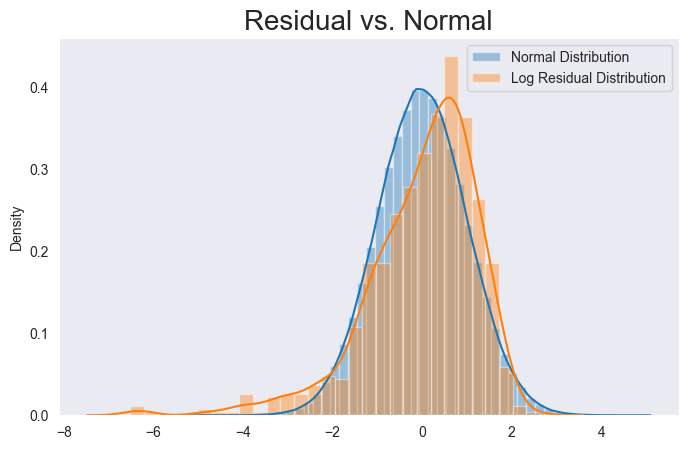

In [17]:
fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
fig, ax2 = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(model.resid, kde = True, rug = True , ax = ax1)
plt.title('Residual Plot', fontsize = 20)
sns.distplot(np.random.normal(size=1000000), kde = True, ax = ax2, label = 'Normal Distribution')
sns.distplot(np.log(model.resid) - np.log(model.resid).mean() , 
             kde = True, rug = False , ax = ax2, label = 'Log Residual Distribution')
plt.legend()
plt.title('Residual vs. Normal', fontsize = 20)

In [18]:
teststart = datetime.datetime(2022, 10, 31)
testend = datetime.datetime(2022, 11, 15)
test_df_null = wb.DataReader("005930", "naver", teststart, testend)
samsung = np.log(test_df_null['Close'].astype('float')).dropna()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


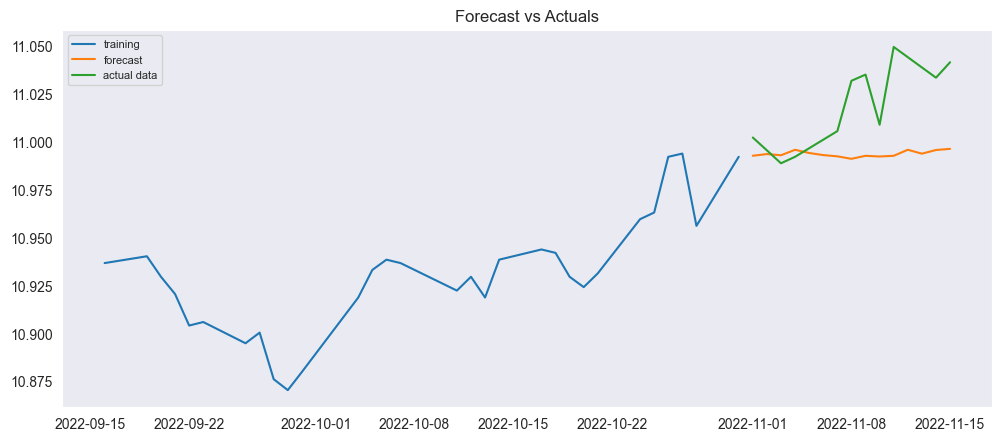

In [19]:
import datetime as dt

left = dt.date(2022, 10, 1)
right = dt.date(2022, 11, 15)

fc = model.forecast(15, alpha=0.05).values

# Make as pandas series
fc_series = pd.Series(fc, index = pd.DatetimeIndex(data = ['2022-11-' + str(i) for i in range(1, 16)]))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(np.log(df_null['Close'][-30:]), label='training')
plt.plot(fc_series, label='forecast')
plt.plot(samsung, label='actual data')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
model.forecast(15, alpha=0.05)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1677    10.992599
1678    10.993473
1679    10.992861
1680    10.995709
1681    10.994034
1682    10.992942
1683    10.992291
1684    10.991002
1685    10.992571
1686    10.992213
1687    10.992571
1688    10.995712
1689    10.993683
1690    10.995592
1691    10.996194
Name: predicted_mean, dtype: float64

In [21]:
samsung

Date
2022-11-01    11.002100
2022-11-02    10.995411
2022-11-03    10.988677
2022-11-04    10.992050
2022-11-07    11.005428
2022-11-08    11.031659
2022-11-09    11.034890
2022-11-10    11.008744
2022-11-11    11.049301
2022-11-14    11.033275
2022-11-15    11.041321
Name: Close, dtype: float64